In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Распределение Лапласа
Сгенерируем выборку объема 1000 из распеределения Лапласа
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0

In [52]:
N = 1000
a = 2.0
b = 1.0
laplace_rv = sts.laplace(scale=1/a, loc=b)
sample = laplace_rv.rvs(N)

На одном графике строим функцию плотности распределения и гистограмму сгенерированной выборки

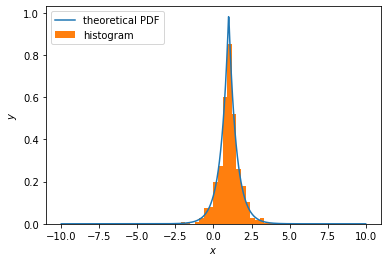

In [53]:
x = np.linspace(-10, 10, N)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

plt.hist(sample, bins=20, density=True, label='histogram')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Подсчитаем матожидание и дисперсию распределения Лапласа

In [91]:
laplace_var = 2.0 /(a * a)
laplace_mean = b

print("Матожидание: %4.2f, Дисперсия: %4.2f" % (laplace_mean, laplace_var))

Матожидание: 1.00, Дисперсия: 0.50


Для значений n равных 5, 10, 50 построим на одном графике гистограммы распределения выборочных средних для сгенерированных выборок, которых для каждого n будет ровно 1000, и функцию нормального распределения, которое приближает распределение выборочных средних

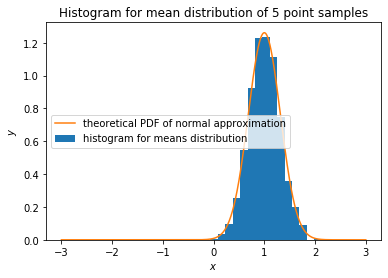

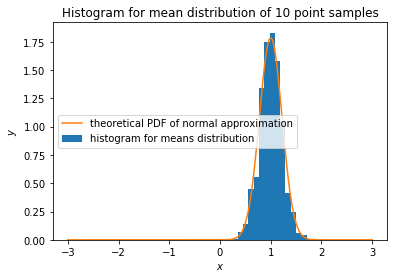

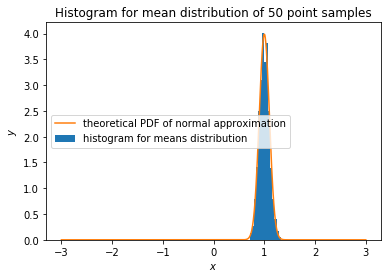

In [85]:
import math
n_arr = [5, 10, 50]
N = 1000

x = np.linspace(-3,3,1000)

for n in n_arr:
    samples = np.array([laplace_rv.rvs(n) for i in range(N)])
    means = np.fromiter(map(np.mean, samples), dtype=float)
    
    # расчет среднеквадратичного отклонения здесь, так как зависит от n
    std_dev = math.sqrt(laplace_var/n)
    norm_rv = sts.norm(laplace_mean, std_dev)
    norm_pdf = norm_rv.pdf(x)
    
    plt.figure()
    plt.hist(means, bins=15, density=True, label='histogram for means distribution')
    plt.plot(x, norm_pdf, label='theoretical PDF of normal approximation')
    plt.ylabel('$y$')
    plt.xlabel('$x$')
    plt.legend(loc='center left')
    plt.title('Histogram for mean distribution of ' + str(n) + ' point samples')

## Вывод
Подтвердил ЦПТ, то есть убдеился, что распределение выборочных средних достаточно хорошо описывается нормальным распределением.
Чем больше выборку берем для оценки выборочного среднего распределения, тем точнее ее можно аппроксимировать нормальным распределением. Разброс относительно оцениваемого матожидания уменьшается с увеличением размера выборок.